In [41]:
%matplotlib inline



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [44]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [45]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [46]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [47]:
## basic plot for smaller data , we can check
sns.pairplot(USAhousing)

In [48]:
## checking the distribution of the price, since we are about to find that only

In [53]:
sns.displot(USAhousing["Price"])

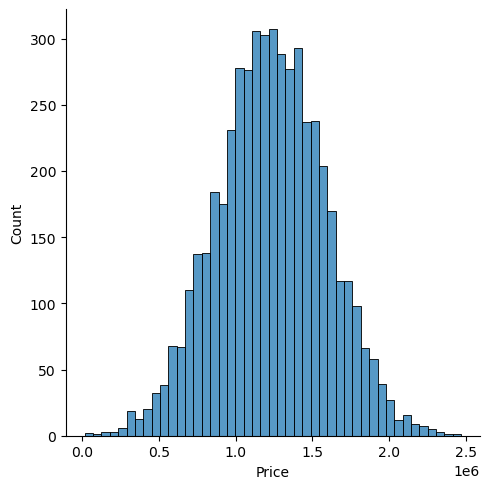

In [54]:
plt.show()

In [56]:
## getting a correlation matrix and then a heat map
USAhousing.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


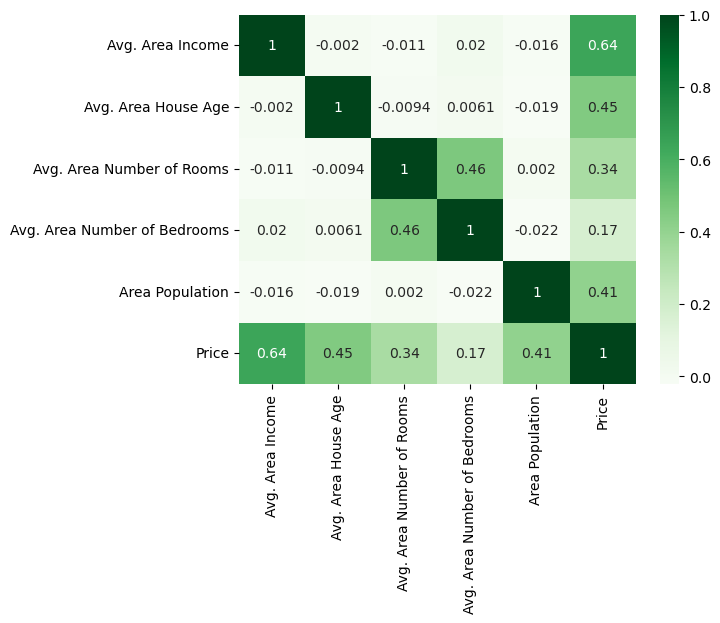

In [63]:
### heatmap
sns.heatmap(USAhousing.corr(numeric_only=True),cmap="Greens", annot=True)
plt.show()

In [64]:
#####  CREATING A MODEL NOW

In [65]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [84]:
## 1. x coordinate is the values that we will use to predict the price. 
## only using the numeric values for now. Later on we might use NLP to analyse the text columns too.
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [85]:
 ##### 2. NOw we will split data into a TRAIN DATA SET and a TEST DATA SET using sci-kit

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
## 40% of the data as test data , common is 30-40%
## random_state is just a random splits .

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

In [98]:
## 3. fit my model on my training data
lm.fit(X_train,y_train)

LinearRegression()


## 4.  Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

## 4. Let's evaluate the model by checking out it's coefficients and how we can interpret them.
# print the intercept

In the context of linear regression, the **intercept** represents the expected value of the target variable (\(y\)) when all the predictor variables (\(X_1, X_2, ..., X_n\)) are equal to zero. It is essentially the constant term in the linear equation:

\[
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
\]

Here:
- \(\beta_0\) is the intercept (\(lm.intercept_\)).
- \(\beta_1, \beta_2, ..., \beta_n\) are the coefficients (\(lm.coef_\)).
- \(X_1, X_2, ..., X_n\) are the predictor variables.

### What Does `lm.intercept_` Mean?
The value of `lm.intercept_` is the predicted value of \(y\) when all the predictor variables (\(X_1, X_2, ..., X_n\)) are zero. In practical terms:

1. **If All Predictors Are Zero**:
   - The intercept shows the baseline level of the dependent variable when the model assumes no influence from the predictors.
   - For example, if you are predicting house prices and all predictors (like size, number of rooms, location) are zero, the intercept is the predicted base price of the house.

2. **Interpretability Depends on Data Context**:
   - If setting all predictors to zero is **meaningful** in your dataset, the intercept will be meaningful too.
   - If setting all predictors to zero is **not realistic** (e.g., predicting salary with years of experience = 0 for a senior role), the intercept might not have a practical interpretation.

3. **Intercept Can Be Positive or Negative**:
   - A positive intercept indicates the baseline value is above zero.
   - A negative intercept indicates the baseline value is below zero.

### Example:
If you’re building a regression model to predict car prices based on mileage (\(X_1\)) and age (\(X_2\)):

\[
\text{Price} = \beta_0 + \beta_1 (\text{Mileage}) + \beta_2 (\text{Age})
\]

- \(\beta_0 = 20,000\): This means that when a car has 0 mileage and is brand new (age = 0), the predicted price is \$20,000.
- If \(\beta_0 = -500\), it indicates a negative baseline, which might suggest poor scaling of data or a dataset issue.

In summary, the intercept provides the starting point of the regression line, and its meaning depends on the context and the range of your predictor variables.

In [100]:
print(lm.intercept_)

-2640159.79685191
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [101]:
###  5. Coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

The attribute `lm.coef_` in a linear regression model represents the **coefficients** (also known as weights or slopes) of the predictor variables. These coefficients describe how each independent variable (\(X_1, X_2, ..., X_n\)) affects the dependent variable (\(y\)) in the linear regression equation:

\[
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
\]

Here:
- \(\beta_0\): The intercept (`lm.intercept_`), the predicted value of \(y\) when all \(X\) values are 0.
- \(\beta_1, \beta_2, ..., \beta_n\): The coefficients (`lm.coef_`), which quantify the impact of each predictor \(X_1, X_2, ..., X_n\) on \(y\).

### What Does `lm.coef_` Represent?
Each value in `lm.coef_` corresponds to a predictor variable and represents the change in the dependent variable (\(y\)) for a **unit increase** in the corresponding predictor variable, assuming all other predictors are held constant.

#### Example:
Assume we are predicting house prices (\(y\)) based on size (\(X_1\)) and location quality score (\(X_2\)):

\[
\text{Price} = \beta_0 + \beta_1 (\text{Size}) + \beta_2 (\text{Location})
\]

If:
- \(\beta_1 = 3000\): For every 1-unit increase in size, the house price increases by $3000, assuming location stays the same.
- \(\beta_2 = 5000\): For every 1-unit increase in location score, the house price increases by $5000, assuming size remains constant.

### Key Points:
1. **Interpretation of Coefficients**:
   - Positive coefficient (\(+\)) means an increase in \(X\) leads to an increase in \(y\).
   - Negative coefficient (\(-\)) means an increase in \(X\) leads to a decrease in \(y\).

2. **Order of Coefficients**:
   - The coefficients in `lm.coef_` correspond to the order of the predictor variables in your input data (e.g., if \(X = [X_1, X_2]\), then `lm.coef_ = [\beta_1, \beta_2]`).

3. **Magnitude**:
   - Larger coefficients mean the corresponding predictor variable has a greater influence on \(y\).
   - However, the magnitude of coefficients is sensitive to the scale of the variables. Normalization or standardization may be needed for meaningful comparisons.

4. **Units**:
   - The interpretation depends on the units of both the predictor and the target variable.

5. **Accessing `lm.coef_`**:
   In Python, you can access `lm.coef_` after fitting the linear regression model:
   ```python
   from sklearn.linear_model import LinearRegression
   import numpy as np

   # Example Data
   X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
   y = np.array([2.5, 3.5, 4.5, 5.5])

   # Fit Linear Regression Model
   lm = LinearRegression()
   lm.fit(X, y)

   # Get Coefficients
   print("Coefficients:", lm.coef_)
   ```

### Summary:
- `lm.coef_` contains the regression coefficients (\(\beta_1, \beta_2, ..., \beta_n\)).
- Each coefficient represents the effect of one unit of change in the predictor on the target variable, keeping all other predictors constant.


In [102]:
## 6. creating dataframe from the coeffcients
## each coefficient relates to a column in the X_train data

In [105]:
pd.DataFrame(data = lm.coef_,index= X.columns, columns=["Coeff"])
## the below tables means, basically 
## a unit increase in the indexes (eg avg. area income) can increase house prices by 21 times and so on.



,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.